In [1]:
import os
import clr
import sys
from System import Array
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
# sys.path.append(os.getcwd())
%matplotlib inline

In [2]:
dll_path = os.path.join(os.getcwd(),'lecroy_driver\\Library\\ArbStudioSDK')
clr.System.Reflection.Assembly.LoadFile(dll_path + '.dll')

from clr import ActiveTechnologies
api = ActiveTechnologies.Instruments.AWG4000.Control

### Create device

In [3]:
dev = api.DeviceSet().DeviceList[0]
# devlist = devset.DeviceList
# dev = devlist[0]

### Create channels

In [6]:
#Create empty array of four channels
channels = Array.CreateInstance(api.Functionality, 4)
#Initialize each of the channels
channels[0] = api.Functionality.ARB
channels[1] = api.Functionality.ARB
channels[2] = api.Functionality.ARB
channels[3] = api.Functionality.ARB

In [7]:
# Iniitalize ArbStudio
return_msg = dev.Initialize(channels)
assert return_msg.ErrorSource == api.ErrorCodes.RES_SUCCESS,\
       "Error initializing ARB: {}".format(return_msg.ErrorDescription)

## Set waveform

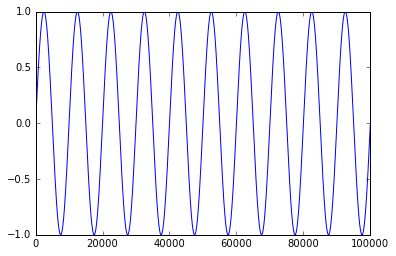

In [8]:
N = 100000
samples=list(np.sin(2*np.pi*np.arange(N)/N*10))
plt.plot(samples)
plt.show()

In [10]:
channels = [dev.GetChannel(k) for k in range(4)]

#Choose channel
channel = channels[0]
channel.SetTriggerMode(api.TriggerMode.Stepped)
channel.SetInternalTrigger()
channel.SetExternalTrigger(api.TriggerSource.FPTriggerIN,
                           api.SensitivityEdge.RisingEdge,
                           api.TriggerAction.TriggerStart)

# Load waveform
waves = Array.CreateInstance(api.WaveformStruct,2)
wave = waves[0]
wave.Sample = samples
waves[0] = wave
wave = waves[1]
wave.Sample = [0]*N
waves[1] = wave
return_msg = channel.LoadWaveforms(waves)
assert return_msg.ErrorSource == api.ErrorCodes.RES_SUCCESS,\
    "Loading waveforms Error: {}".format(return_msg.ErrorDescription);

# Load sequence
sequence = Array.CreateInstance(api.GenerationSequenceStruct,2)
subsequence = sequence[0]
subsequence.WaveformIndex = 0
subsequence.Repetitions = 1
sequence[0] = subsequence

subsequence = sequence[1]
subsequence.WaveformIndex = 1
subsequence.Repetitions = 1
sequence[1] = subsequence

trans = Array.CreateInstance(api.TransferMode,1)
return_msg = channel.LoadGenerationSequence(sequence, trans[0], True)
assert return_msg.ErrorSource == api.ErrorCodes.RES_SUCCESS,\
    "Loading sequence Error: {}".format(return_msg.ErrorDescription);

# channel.SetExternalTrigger(api.TriggerSource.FPTriggerIN)

In [11]:
#TESTING
subsequence.

## Run sequence

In [138]:
channels_list = range(1,5)
return_msg = dev.RUN([1])
assert return_msg.ErrorSource == api.ErrorCodes.RES_SUCCESS,\
    "Running ArbStudio error: {}".format(return_msg.ErrorDescription)

In [136]:
return_msg = dev.STOP()
assert return_msg.ErrorSource == api.ErrorCodes.RES_SUCCESS,\
    "Stopping ArbStudio error: {}".format(return_msg.ErrorDescription)

# Testing Arbstudio + PulseBlaster

In [39]:
from qcodes.instrument_drivers.spincore import PulseBlasterESRPRO
PulseBlaster = PulseBlasterESRPRO.PulseBlaster('PulseBlaster')

PulseBlaster.detect_boards()
PulseBlaster.select_board(0)
PulseBlaster.core_clock(500)

<IPython.core.display.Javascript object>

In [127]:
Narb = 10
Ndigitizer = 1000
Nlow = 1000000
PulseBlaster.start_programming()
start = PulseBlaster.send_instruction(3,'continue',0,Ndigitizer)
PulseBlaster.send_instruction(6,'continue',0,Narb)
PulseBlaster.send_instruction(0, 'continue', 0, Nlow)
PulseBlaster.send_instruction(6,'continue',0,Narb)
PulseBlaster.send_instruction(0, 'branch', start, Nlow)
PulseBlaster.stop_programming()

# PulseBlaster.start()

0

In [128]:
PulseBlaster.start()

0

In [115]:
PulseBlaster.stop()

0

In [280]:
ch = channels[0]

In [284]:
ch.SetTriggerMode(api.TriggerMode.Stepped)